In [35]:
!pip install ipykernel
!pip install pandas
!pip install scikit-learn
!pip install matplotlib seaborn



### Step 1: Setting  Environment

#### Step 2: Loading & Exploring the Data

In [36]:
import pandas as pd
df = pd.read_csv("AmesHousing.csv")
df.head()
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
                  ... 
Mo Sold              0
Yr Sold              0
Sale Type            0
Sale Condition       0
SalePrice            0
Length: 82, dtype: int64

### Step 3: Clean the Data
Drop columns with excessive missing values:

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('AmesHousing.csv')

# Drop columns with excessive missing values
df.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence'], inplace=True)

# Fill missing values: median for numeric, mode for categorical
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Ali Kasuti\AppData\Local\Temp\ipykernel_11696\1270838590.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


 Step 4: Prepare Features and Target

In [38]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 5: Build Models

In [39]:
# Import required regressors
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

 Step 6: Evaluate Performance

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define evaluation function
def evaluate(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Evaluate both models
evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Decision Tree", y_test, y_pred_dt)

Linear Regression - RMSE: 29152.88, R²: 0.89
Decision Tree - RMSE: 35521.86, R²: 0.84


Step 7: Visualize Results

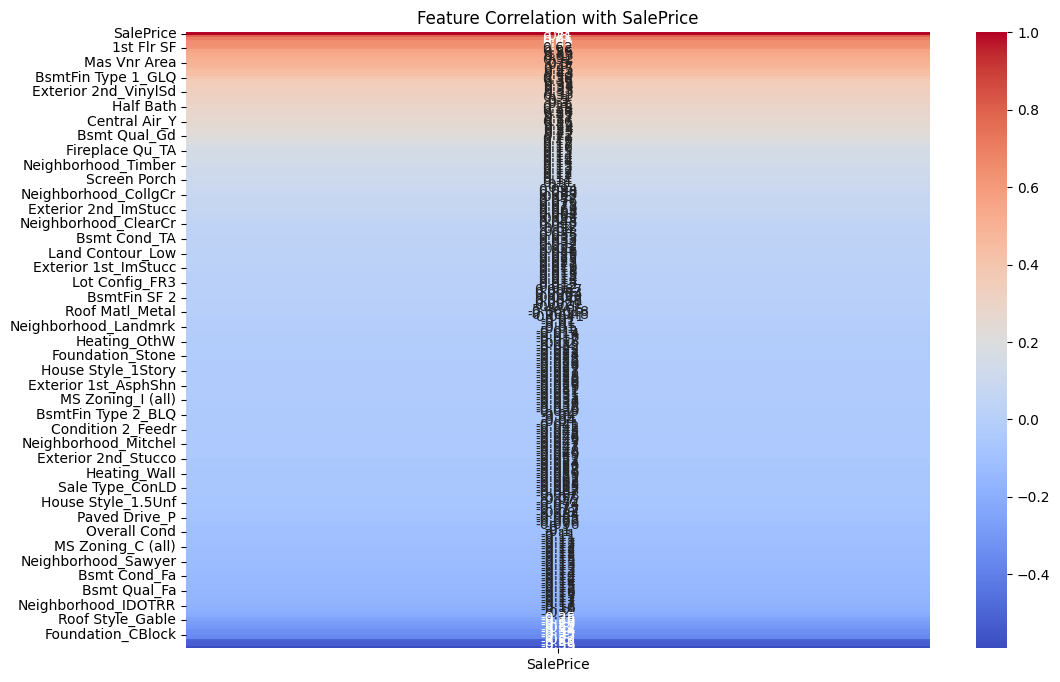

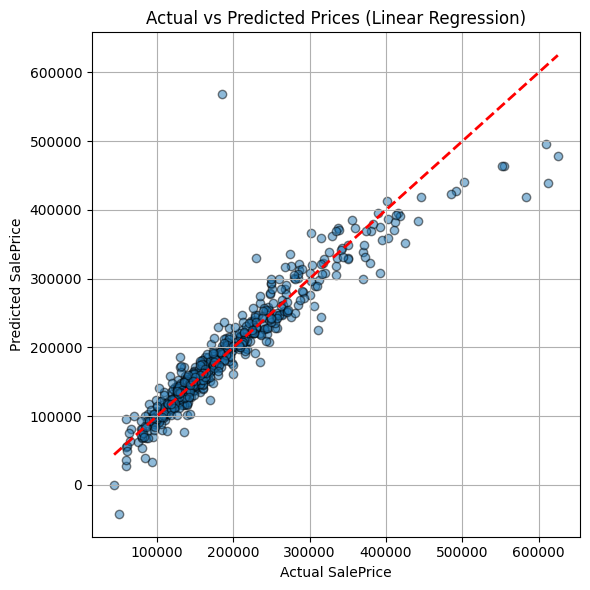

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).to_frame()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with SalePrice")
plt.show()

# Actual vs Predicted (Linear Regression)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, edgecolor='k')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.grid(True)
plt.tight_layout()
plt.show()


#### CONCLUSION

1. Correlation Heatmap with SalePrice
What this is:
This heatmap shows the correlation coefficient between SalePrice and every other numeric feature in your dataset. The values range from -1 to +1:

+1: perfect positive correlation

-1: perfect negative correlation

0: no linear relationship

What stands out:
✅ Strong Positive Correlations (Most important predictors):
These features are positively and strongly correlated with SalePrice:

OverallQual: Quality of the materials and finish of the house.

GrLivArea: Above ground living area (square feet).

GarageCars: Number of cars that can fit in the garage.

GarageArea: Size of garage in square feet.

TotalBsmtSF: Total square feet of basement area.

1stFlrSF: Size of the first floor.

FullBath, TotRmsAbvGrd, etc.

These variables are critical predictors — an increase in these is generally associated with higher sale prices.

⚠️ Moderate or Weak Correlations:
Features like Fireplaces, MasVnrArea (Masonry veneer area), and BsmtQual also show moderate correlations.

🔻 Negative or Negligible Correlations:
Some features show little to no correlation or even a negative one, such as:

KitchenAbvGr: More kitchens might lower price (unusual case).

EnclosedPorch, OverallCond: May not linearly influence price.

Some dummy-coded categorical features that are not strong indicators.

Why it matters:
These correlations help us select or prioritize features for modeling. Features with little or no correlation may not contribute much predictive power in a linear model.

📈 2. Actual vs Predicted Prices (Linear Regression)
What this is:
This scatter plot compares:

X-axis: Actual house prices (SalePrice) from the test set.

Y-axis: Predicted prices by your Linear Regression model.

A red dashed diagonal line (y = x) is included as a reference: perfect predictions would fall exactly on this line.

Interpretation:
✅ Good Overall Fit:
Most points cluster around the red line, suggesting that your linear regression model predicts prices reasonably well.

The tight clustering indicates low residuals (errors) for many cases — meaning good accuracy.

⚠️ Slight Under- or Over-Prediction:
Some predictions are slightly below the red line (under-predicted).

Others are above (over-predicted), but generally not drastically.

❗ Outliers and Model Limitations:
In the higher price range, the model tends to under-predict — i.e., it doesn't fully capture very high-end house prices.

This is a known limitation of linear regression — it struggles when the relationship is non-linear or influenced by rare/unseen feature combinations.